In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan7_8/assignment/tuto/'

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan7_8/assignment/tuto


Learn how to detect edges in images with kornia.filters components

In [3]:
%%capture
!pip install kornia

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

We use OpenCV to load an image to memory represented in a numpy.ndarray

In [16]:
import os
curent = os.getcwd()
print(curent)

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan7_8/assignment/tuto


In [24]:
# img_bgr : np.ndarray = cv2.imread('../images/HUST.jpg', cv2.IMREAD_COLOR)
img_bgr : np.ndarray = cv2.imread(curent + '/images/doraemon.png', cv2.IMREAD_COLOR)

In [25]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)

In [28]:
def imshow(input: torch.Tensor):
  out = torchvision.utils.make_grid(input, nrow = 2, padding = 5)
  out_np : np.ndarray = K.utils.tensor_to_image(out)
  plt.imshow(out_np)
  plt.axis('off')
  plt.show()

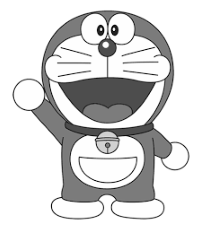

In [29]:
imshow(x_gray)

## First order derivates

In [30]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order = 1) # BxCx2xHxW
grads_x = grads[:,:,0]
grads_y = grads[:,:,1]

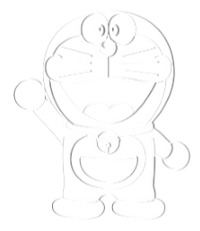

In [31]:
# Show first derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

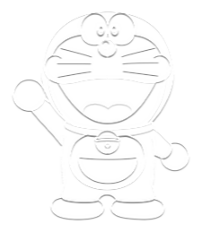

In [32]:
# Show first derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## 2nd order derivatives

In [33]:
grads = K.filters.spatial_gradient(x_gray, order = 2)
grads_x = grads[:,:,0]
grads_y = grads[:,:,1]

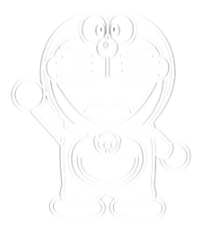

In [34]:
# show second derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

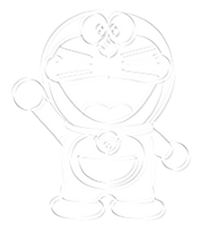

In [35]:
# show second derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## Sobel Edges

Once with the gradients in the two directions we can compute the Sobel edges. However, in kornia we already have it implemented

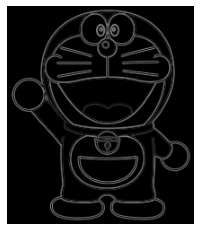

In [36]:
x_sobel = K.filters.sobel(x_gray)
imshow(x_sobel)

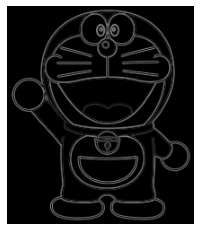

In [38]:
y_sobel = K.filters.sobel(x_gray)
imshow(y_sobel)

## Laplacian edges

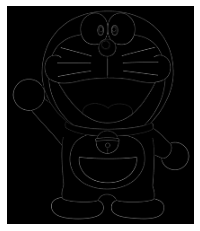

In [39]:
x_laplacian = K.filters.laplacian(x_gray, kernel_size = 5)
imshow(x_laplacian.clamp(0., 1.))

## Canny edges

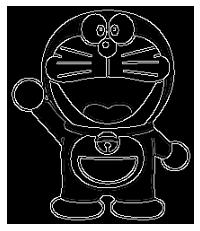

In [40]:
x_canny = K.filters.canny(x_gray)[0]
imshow(x_canny.clamp(0., 1.))

Do with my image

(256, 256, 3)
torch.Size([1, 3, 256, 256])


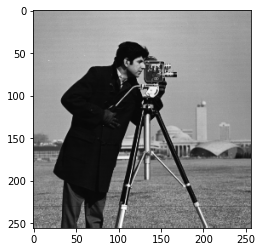

In [53]:
x_bgr = cv2.imread(curent+'/images/cameraman.png')
plt.imshow(x_bgr)
print(x_bgr.shape)
x_bgr = K.utils.image_to_tensor(x_bgr)
x_bgr = x_bgr[None,...].float() / 255.
print(x_bgr.shape)

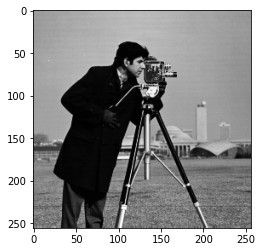

In [54]:
x_rgb = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)
plt.imshow(x_gray.squeeze(0).squeeze(0), cmap = 'gray')

## Sobel

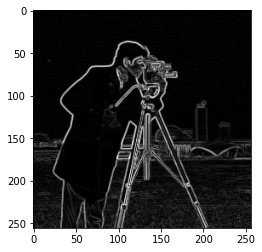

In [57]:
G = K.filters.sobel(x_gray)
plt.imshow(G.squeeze(), cmap = 'gray');

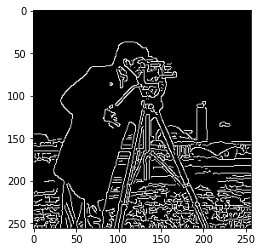

In [68]:
C = K.filters.canny(x_gray)[1]
plt.imshow(C.squeeze(), cmap = 'gray');